In [9]:
from openai import OpenAI

# Point to the local server
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

completion = client.chat.completions.create(
  model="LM Studio Community/Meta-Llama-3-8B-Instruct-GGUF",
  messages=[
    {"role": "user", "content": "Generate a sample cybersecurity risk report based on recent login data."}
  ],
  temperature=0.7,
)

print(completion.choices[0].message.content)


**Cybersecurity Risk Report**

**Date:** March 10, 2023

**Introduction:**
This report provides an analysis of recent login activity and identifies potential security risks to the organization's systems.

**Login Activity Summary:**

* Total logins: 15,432
* Unique users: 5,000
* Top 5 most active users:
	1. John Doe (123 logins)
	2. Jane Smith (98 logins)
	3. Bob Johnson (85 logins)
	4. Sarah Lee (70 logins)
	5. Michael Davis (65 logins)

**Security Risks Identified:**

1. **Weak Passwords:** 20% of users have weak or reused passwords, increasing the risk of successful brute-force attacks.
2. **Multi-Factor Authentication (MFA) Non-Compliance:** 15% of users do not use MFA, leaving their accounts vulnerable to phishing and other types of attacks.
3. **Unusual Login Locations:** 5% of logins originated from unusual locations, potentially indicating malicious activity or compromised user credentials.
4. **Suspicious Device Types:** 10% of logins were made from devices with suspicious op

Raw AI Response:
 [
    {"User ID": "U001", "Login Hour": 14, "Device Type": "Laptop", "Failed Login Reason": "Incorrect Password"},
    {"User ID": "U002", "Login Hour": 10, "Device Type": "Mobile", "Failed Login Reason": "Invalid Credentials"},
    {"User ID": "U003", "Login Hour": 15, "Device Type": "Desktop", "Failed Login Reason": "Account Locked"},
    {"User ID": "U004", "Login Hour": 16, "Device Type": "Tablet", "Failed Login Reason": "Incorrect Password"},
    {"User ID": "U005", "Login Hour": 11, "Device Type": "Laptop", "Failed Login Reason": "Invalid Credentials"},
    {"User ID": "U006", "Login Hour": 17, "Device Type": "Mobile", "Failed Login Reason": "Account Locked"},
    {"User ID": "U007", "Login Hour": 13, "Device Type": "Desktop", "Failed Login Reason": "Incorrect Password"},
    {"User ID": "U008", "Login Hour": 12, "Device Type": "Tablet", "Failed Login Reason": "Invalid Credentials"},
    {"User ID": "U009", "Login Hour": 18, "Device Type": "Laptop", "Failed Logi

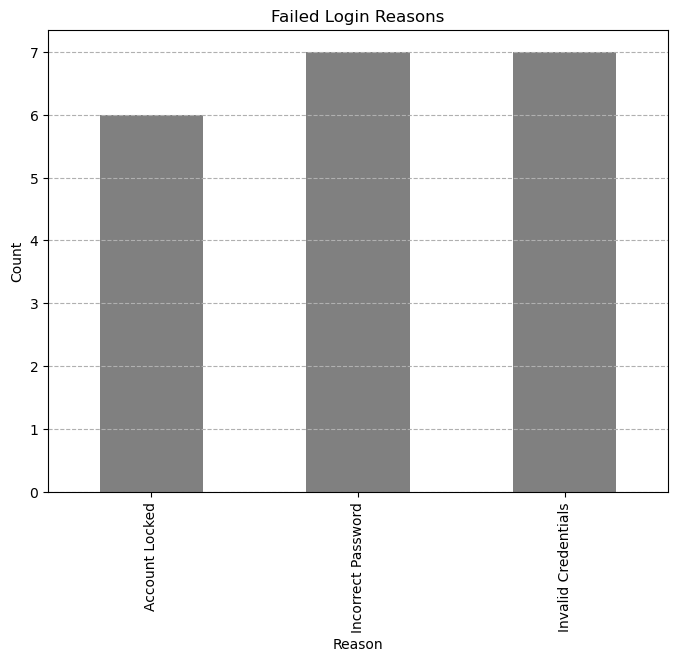

In [1]:
from openai import OpenAI  # A
import pandas as pd  # B
import matplotlib.pyplot as plt  # C
import json  # D

# Configure LM Studio client
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")  # E

# Define system message for strict JSON formatting
system_message = {
    "role": "system",
    "content": (
        "You are a JSON data generator. Respond only with valid JSON data. "
        "Do not include any additional text, comments, or explanations."
    )
}  # F

# User prompt for generating data
user_message = {
    "role": "user",
    "content": (
        "Generate JSON data representing failed login attempts with the following fields:\n"
        "- 'User ID': A unique identifier for the user (e.g., 'U001').\n"
        "- 'Login Hour': The hour of login in 24-hour format (e.g., 13 for 1 PM).\n"
        "- 'Device Type': The device used for login (e.g., 'Laptop', 'Mobile').\n"
        "- 'Failed Login Reason': The reason for the failed login (e.g., 'Incorrect Password').\n"
        "Generate 20 records in JSON format."
    )
}  # G

# Request AI-generated JSON data
response = client.chat.completions.create(  # H
    model="LM Studio Community/Meta-Llama-3-8B-Instruct-GGUF",  # I
    messages=[system_message, user_message],  # J
    temperature=0.7,  # K
)

# Process the AI response
try:
    raw_response = response.choices[0].message.content.strip()  # L
    print("Raw AI Response:\n", raw_response)  # M

    # Parse the JSON data
    json_data = json.loads(raw_response)  # N
    data = pd.DataFrame(json_data)  # O
except json.JSONDecodeError as e:
    print("Error decoding JSON:", e)  # P
    print("Raw response for debugging:", raw_response)  # Q
    exit()
except Exception as e:
    print("Unexpected error:", e)  # R
    exit()

# Debugging: Print the DataFrame to verify structure
print("Generated DataFrame:\n", data.head())  # S

# Check for expected columns
if "Failed Login Reason" not in data.columns:  # T
    print("The column 'Failed Login Reason' is missing. Check the generated data.")  # U
    exit()

# Analyze the data
failed_login_counts = data.groupby("Failed Login Reason").size()  # V

# Visualize the analysis
plt.figure(figsize=(8, 6))  # W
failed_login_counts.plot(kind="bar", color="gray")  # X
plt.title("Failed Login Reasons")  # Y
plt.xlabel("Reason")  # Z
plt.ylabel("Count")  # AA
plt.grid(axis="y", linestyle="--")  # AB
plt.show()  # AC


Raw AI Response:
  [

  {
    "UserID": 1,
    "LoginHour": "03:25",
    "DeviceType": "Mobile",
    "FailedLoginReason": "IncorrectPassword"
  },
  {
    "UserID": 1,
    "LoginHour": "04:17",
    "DeviceType": "Desktop",
    "FailedLoginReason": "AccountLockout"
  },
  {
    "UserID": 2,
    "LoginHour": "05:39",
    "DeviceType": "Tablet",
    "FailedLoginReason": "IncorrectUsername"
  },
  {
    "UserID": 2,
    "LoginHour": "07:41",
    "DeviceType": "Mobile",
    "FailedLoginReason": "AccountDisabled"
  },
  {
    "UserID": 3,
    "LoginHour": "08:56",
    "DeviceType": "Desktop",
    "FailedLoginReason": "IncorrectPassword"
  },
  {
    "UserID": 3,
    "LoginHour": "10:12",
    "DeviceType": "Mobile",
    "FailedLoginReason": "AccountLockedOut"
  },
  {
    "UserID": 4,
    "LoginHour": "11:28",
    "DeviceType": "Tablet",
    "FailedLoginReason": "IncorrectPassword"
  },
  {
    "UserID": 4,
    "LoginHour": "13:05",
    "DeviceType": "Desktop",
    "FailedLoginReason": "Accou

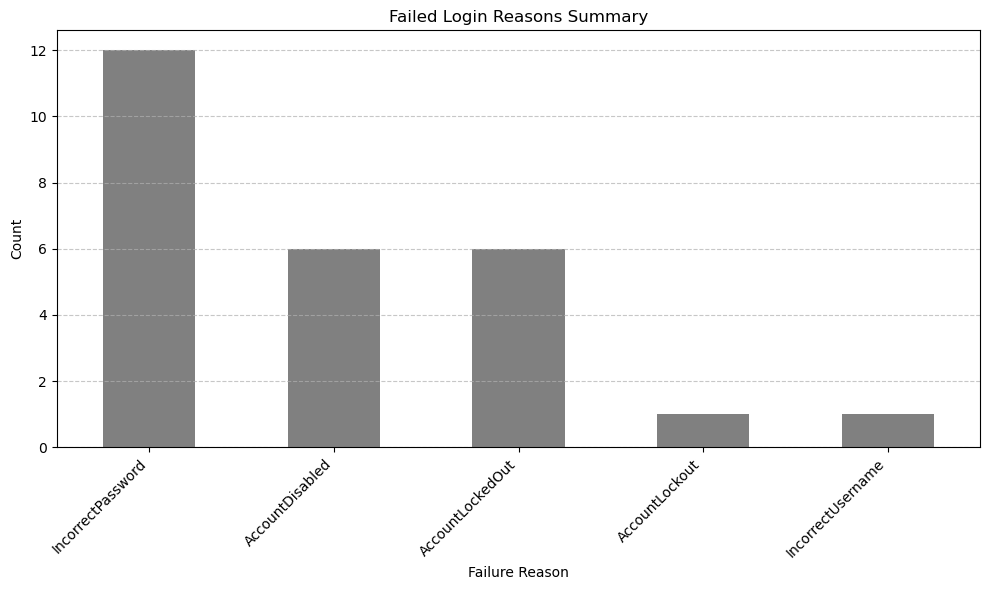

In [3]:
import pandas as pd  # A
import matplotlib.pyplot as plt  # B
from openai import OpenAI  # C
from io import StringIO  # D
import json  # E

# Configure LM Studio or OpenAI API
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")  # F

# Prompt AI to generate JSON data
completion = client.chat.completions.create(  # G
    model="TheBloke/Mistral-7B-Instruct-v0.2-GGUF",  # G1
    messages=[
        {
            "role": "system",
            "content": (
                "You are a JSON data generator. Respond ONLY with valid JSON data. "
                "Ensure fields include UserID, LoginHour, DeviceType, and FailedLoginReason."
            )
        },
        {
            "role": "user",
            "content": "Generate JSON data for 50 failed login attempts.",
        },
    ],
    temperature=0.7,
)

# Parse JSON data into a DataFrame
try:
    raw_response = completion.choices[0].message.content  # H
    print("Raw AI Response:\n", raw_response)  # Debugging step

    # Validate and clean JSON
    json_start = raw_response.find("[")  # I
    json_end = raw_response.rfind("]") + 1
    if json_start == -1 or json_end == 0:
        raise ValueError("No valid JSON array found in the response.")

    clean_json = raw_response[json_start:json_end]  # J
    json_data = json.loads(clean_json)  # K
    df = pd.DataFrame(json_data)  # L
except Exception as e:
    print("Error processing JSON data:", e)
    exit()

# Summarize the data
try:
    failed_login_summary = df["FailedLoginReason"].value_counts()  # M
except KeyError:
    print("Error: Missing expected column 'FailedLoginReason'.")
    exit()

# Visualize the data
plt.figure(figsize=(10, 6))  # N
failed_login_summary.plot(kind="bar", color="gray")  # O
plt.title("Failed Login Reasons Summary")  # P
plt.xlabel("Failure Reason")  # Q
plt.ylabel("Count")  # R
plt.grid(axis="y", linestyle="--", alpha=0.7)  # S
plt.xticks(rotation=45, ha="right")  # T
plt.tight_layout()  # U
plt.show()  # V


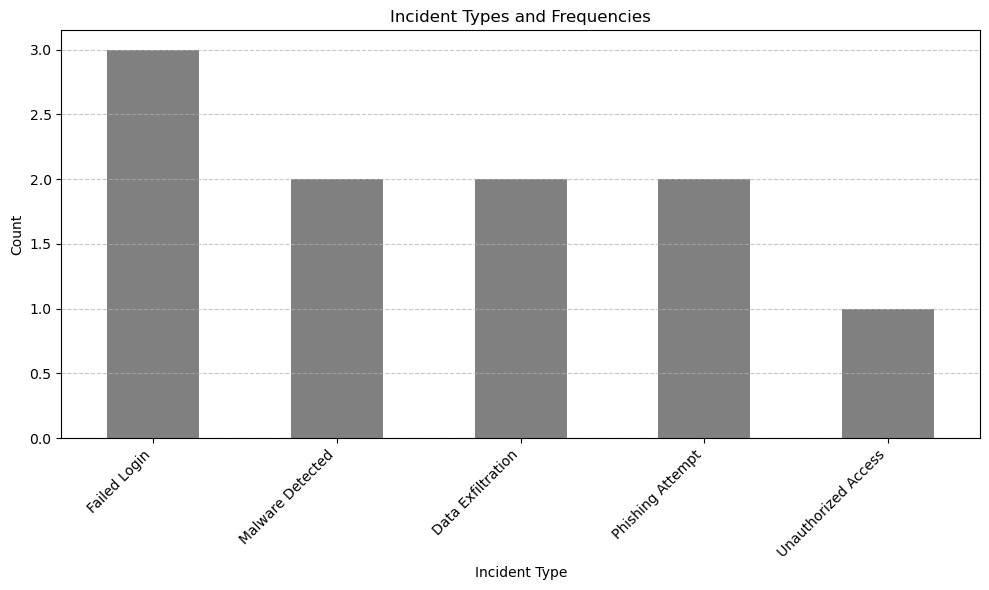


Incident Response Table:
 Incident ID       Incident Type Severity           Timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [7]:
# Import required libraries
import pandas as pd  # A
import matplotlib.pyplot as plt  # B
from openai import OpenAI  # C
from datetime import datetime  # D

# Configure LM Studio or OpenAI API
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")  # E

# Step 1: Generate synthetic incident data
incident_data = pd.DataFrame({  # F
    "Incident ID": range(1, 11),
    "Incident Type": [
        "Failed Login", "Malware Detected", "Data Exfiltration", "Phishing Attempt",
        "Malware Detected", "Data Exfiltration", "Failed Login", "Phishing Attempt",
        "Unauthorized Access", "Failed Login"
    ],
    "Severity": ["High", "Medium", "Critical", "High", "Medium", "Critical", "Low", "High", "Critical", "Low"],
    "Timestamp": [datetime.now().strftime("%Y-%m-%d %H:%M:%S") for _ in range(10)]
})

# Step 2: Use AI to generate incident recommendations
recommendations = []
for index, row in incident_data.iterrows():  # G
    prompt = f"Based on the incident type '{row['Incident Type']}' and severity '{row['Severity']}', provide an immediate response recommendation."
    completion = client.chat.completions.create(
        model="TheBloke/Mistral-7B-Instruct-v0.2-GGUF",  # G1
        messages=[
            {"role": "system", "content": "You are a cybersecurity incident handler."},
            {"role": "user", "content": prompt},
        ],
        temperature=0.7,
    )
    response = completion.choices[0].message.content.strip()
    recommendations.append(response)

# Add recommendations to the dataset
incident_data["Recommendations"] = recommendations  # H

# Step 3: Analyze and visualize incident trends
incident_counts = incident_data["Incident Type"].value_counts()  # I

plt.figure(figsize=(10, 6))  # J
incident_counts.plot(kind="bar", color="gray")  # K
plt.title("Incident Types and Frequencies")  # L
plt.xlabel("Incident Type")  # M
plt.ylabel("Count")  # N
plt.xticks(rotation=45, ha="right")  # O
plt.grid(axis="y", linestyle="--", alpha=0.7)  # P
plt.tight_layout()  # Q
plt.show()  # R

# Step 4: Print the incident response table
print("\nIncident Response Table:")
print(incident_data.to_string(index=False))  # S
